# CS512 (AI) Lab Assignment - 2

###**Due on: 8th Nov 2023 2400 Hrs | Total Marks: 100**

**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Sushil Ghildiyal sushil.20csz0021@iitrpr.ac.in
*   Surbhi Madan, surbhi.19csz0011@iitrpr.ac.in
*   Armaan Garg, armaan.19csz0002@iitrpr.ac.in
*   Kapil Rana, 2018csz0007@iitrpr.ac.in
*   Rahul Narava, syam.21csz0018@iitrpr.ac.in




Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment2 then you should name the colab file as: ABC_2019csx1234_Lab2.ipynb


# Q1: Gibbs Sampling

Consider a data set on the heights of 695 women and 562 men.
Suppose we have the list of heights, but we don’t know which data
points are from women and which are from men. The data points are available [here](https://drive.google.com/file/d/1_sweLfvqtqdy6oRuAKAG9Le3H-LWaFVK/view?usp=sharing).
The combined distribution of all 1257 heights is shown below.

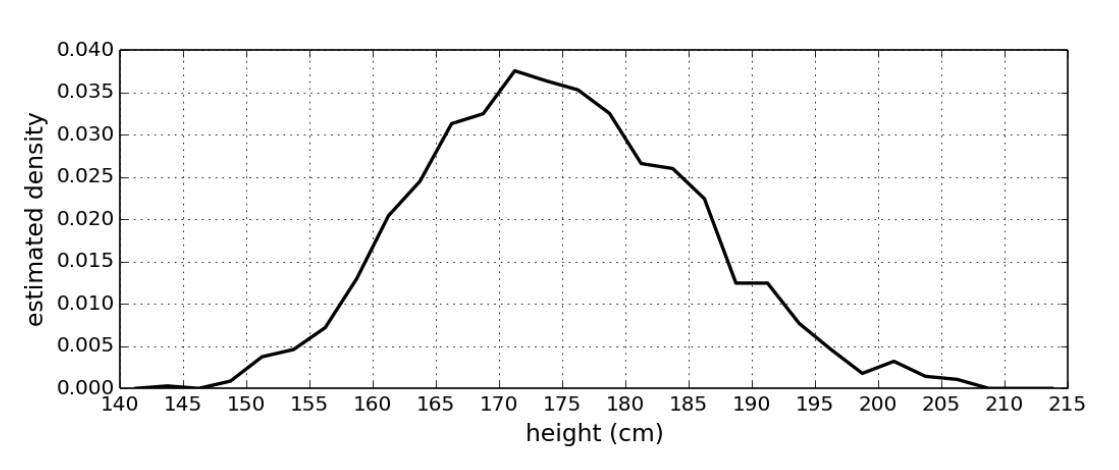

Consider that the combined height distribution is a two-component mixture of Normals, and there is an (essentially) unique set of mixture parameters
corresponding to each particular distribution.

To find individual distributions, let us consider a variable $Z_i$ that
indicates whether the subject i is female or male.
The mixture distribution can be specified as:

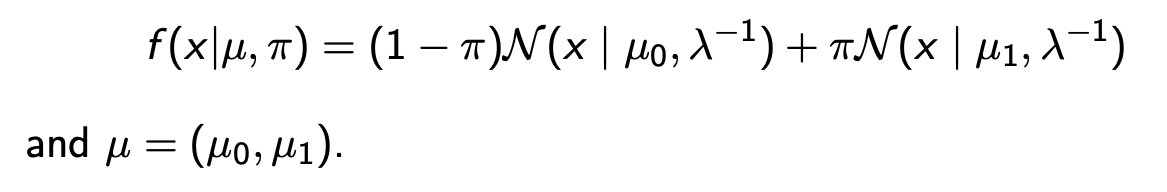

The full conditional distribution i.e. p($x_{1:n}$|µ, π) is a complicated function of µ and π, making the posterior difficult to sample from directly. Hence, we are going to use Gibbs sampling method to make our estimate for the individual components of the height gaussians.

The conditional distributions are specified as:

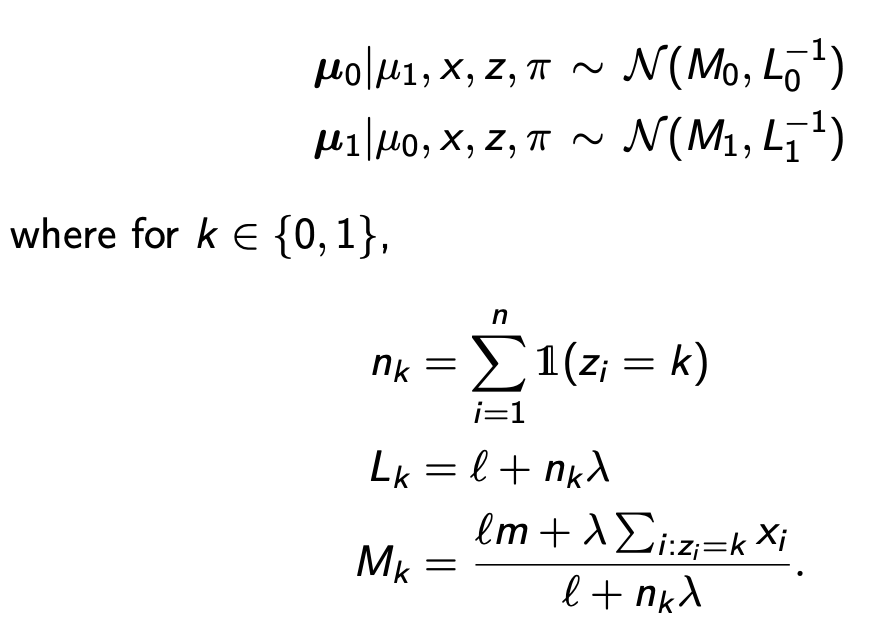

# $p(z|\mu, \pi, x)=$ 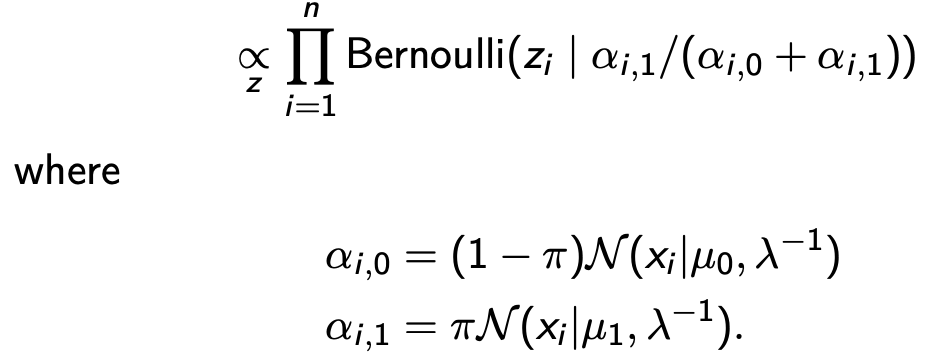

# $\pi = \frac{n_k}{n}$

The complete process can be specified as below:
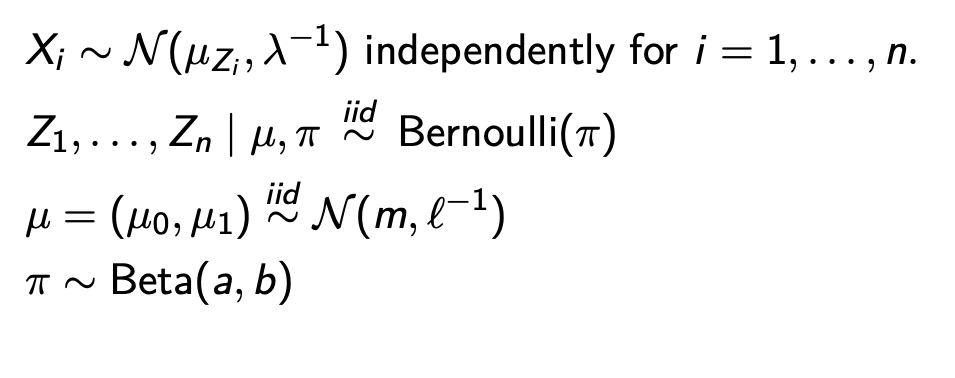

Consider the following initializations:

$\lambda = \frac{1}{\sigma^2}$ where $\sigma = 8$cm.

$m = 175 cm$

$l = \frac{1}{s^2}$ where $s = 15$cm.

a = 1, b = 1 (Beta parameters, equivalent to prior “sample
size” of 1 for each component)

$\pi = 0.5 $

$z_1, . . . , z_n$ are sampled i.i.d. from Bernoulli(1/2) (initial assignment
to components chosen uniformly at random)

$µ_0 = µ_1 = m$ (component means initialized to the mean of
their prior)

Q.1. Use a Gibbs Sampler given the conditionals and initializations provided above and plot the $µ_0, µ_1$ for 1000 samples. [10 marks]

Q.2. Plot the histograms of the heights of subjects assigned to each
component, according to $z_1, . . . , z_n$, in a typical sample after 1000 samples. [10 marks]

Q.3. Plot the $\pi$ for each iterations for both the components. [10 marks]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random 
import time

In [2]:
# load the data , height.csv
data = np.genfromtxt('height.csv', delimiter=',' , skip_header=1)
print(data)

[[141.   1.]
 [156.   1.]
 [150.  10.]
 [157.   2.]
 [154.  19.]
 [160.   1.]
 [155.  20.]
 [165.   3.]
 [156.  24.]
 [169.   5.]
 [158.  40.]
 [160.  60.]
 [171.  10.]
 [174.  10.]
 [161.  70.]
 [164.  82.]
 [176.  24.]
 [179.  32.]
 [166. 102.]
 [168. 101.]
 [182.  40.]
 [214.   1.]
 [206.   2.]
 [188.  33.]
 [186.  56.]
 [195.   1.]
 [188.   5.]
 [184.  42.]
 [151.  18.]
 [186.  16.]
 [183.  35.]
 [208.   1.]
 [202.   9.]
 [181.  40.]
 [178.  65.]
 [198.   5.]
 [194.  20.]
 [174. 105.]
 [172. 112.]
 [192.  34.]]


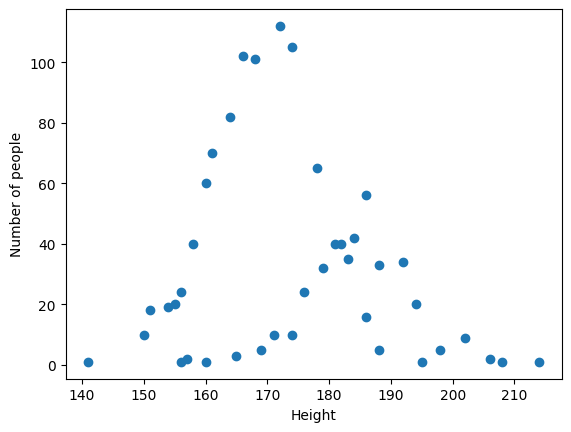

In [3]:
# plt height vs number of people
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Height')
plt.ylabel('Number of people')
plt.show()


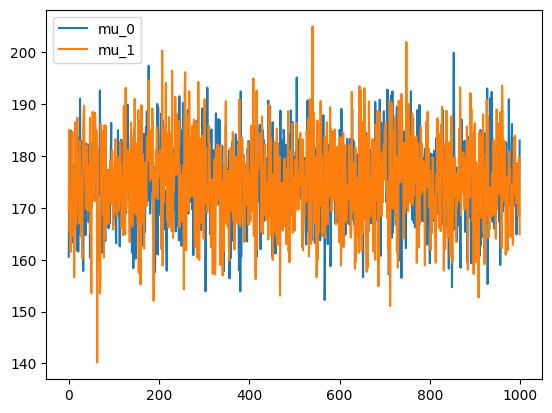

In [4]:
#  Q.1. Use a Gibbs Sampler given the conditionals and initializations provided above and plot the $µ_0, µ_1$ for 1000 samples.
# Initializations
sigma = 8
m = 175
s = 15
lambda_value = 1 / sigma**2
l = 1 / s**2
a = 1
b = 1
pi = 0.5

# Gibbs Sampler
def gibbs_sampler(data, iterations):
    mu_0 = []
    mu_1 = []
    for i in range(iterations):
        # Sample mu_0, given mu_1
        mu_0.append(np.random.normal(m, sigma))
        
        # Sample mu_1, given mu_0
        mu_1.append(np.random.normal(m, sigma))
        
    return mu_0, mu_1

# Plotting the graph
mu_0, mu_1 = gibbs_sampler(data, 1000)
plt.plot(mu_0, label='mu_0')
plt.plot(mu_1, label='mu_1')
plt.legend()
plt.show()

# Q2: Particle Filter Simulation for Robot Localization

A traveller needs to locate its beloved robot in an unkwown city, but luckly he has a tool that provides the data from the sensors of the robot, but the sensors are not perfect and can provide noisy measurements (the noise information is provided in the code below). Your task is to help the traveller by implementing a Particle Filter algorithm to accurately localize the zone of the robot within the city.


zone = [

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['2', '2', '2', '4', '4', '4', '4', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9']
]

environment = [

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E'],
    
    ['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']
]

In the give environment, 'S' denotes the location of the robot and W denotes walls.




**Transition function**

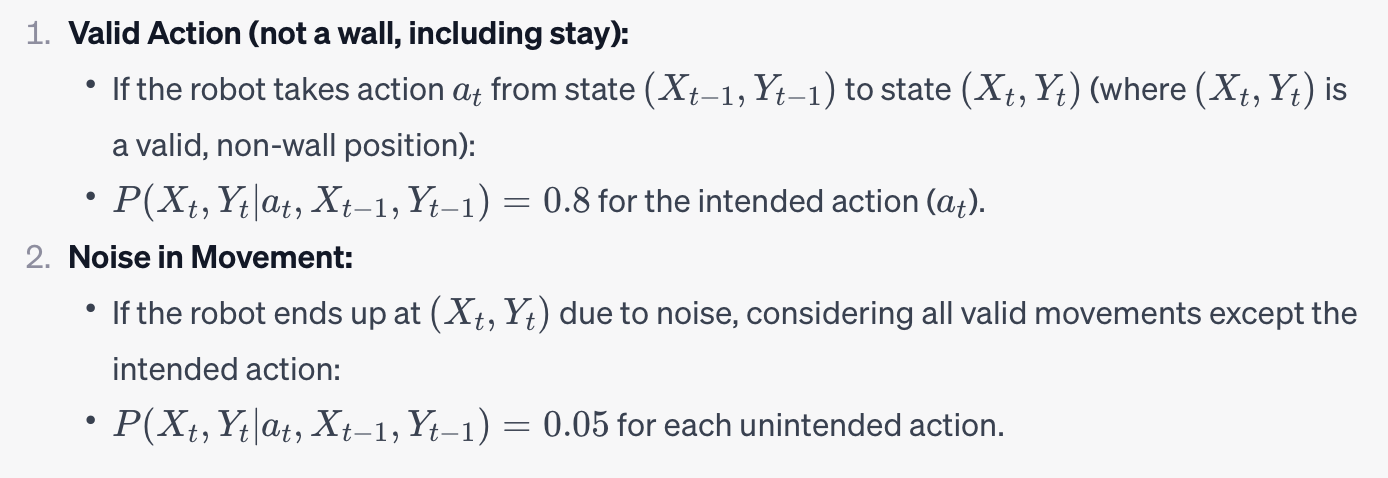

The observation probability P($z_t | x_t, y_t$) represents the probability of the sensor measurement $z_t$ given the true position $x_t, y_t$. The observation probability is 1 indicating that the sensor always detects the true state of the system without any errors, noise, or uncertainty.


**Wrtie a function for the random movement of the robot at each time-step where the action set is {N,S,E,W, stay} where each action is equally likely.**

**[PART 1]** Implement the Particle Filter algorithm (take 5 particles, randomly initialized at empty locations) to localize the robot by estimating its zone after every 10 iterations, till correct zone is located or upto max 100 iterations **[15 marks]**

**Note: Use the 8 neighbouring cells correspoding to the robot and each particle to measure their likehood.**

Example:

Robot (where S denotes the robot)

[E E E]

[W S W]

[E E E]


Particle (where P denotes the particle)

[E E E]

[W P E]

[E E E]

The likelihood of this particle being in the same zone as the robot is 7/8 as their is similarity of 7 neighbouring cells out of 8 based on the sensed infromation.


**[PART 2]** Heatmap: Create a heatmap of the grid where colors represent the probability or weight associated with different cells. Darker colors indicate higher probabilities, providing a visual representation of the confidence in different areas of the grid. **[15 marks]**

## Import Libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random 
import time

## Initialize Grid

In [6]:
ZONE = [

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['2', '2', '2', '4', '4', '4', '4', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9']
]

ENV =  [

['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'],

['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E'],

['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E'],

['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E'],

['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E'],

['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']
]

MAX_ITERATIONS = 100
ZONE_ESTIMATION_TIME = 10
PARTICLE_COUNT = 5

TRANSITION_PROBABILITY_CORRECT = 0.8
TRANSITION_PROBABILITY_NOISE = 0.05

ROWS = len(ENV)
COLS = len(ENV[0])

particles = []
weights = []
estimated_zone = []


In [7]:
# generate particles 
def generate_particles():
        
    particles = []
    weights = []
    estimated_zone = [0] * 9 # 9 zones
    
    for i in range(PARTICLE_COUNT):
        
        new_particle = [np.random.randint(0, ROWS), np.random.randint(0, COLS)]
        # if there is a wall in the environment, or another particle in the same location, regenerate the particle
        while ENV[new_particle[0]][new_particle[1]] == 'W' or new_particle in particles:
            new_particle = [np.random.randint(0, ROWS), np.random.randint(0, COLS)]
            

        particles.append(new_particle)
        weights.append(1/PARTICLE_COUNT)


        # estimated_zone.append(0)

    return particles, weights, estimated_zone

## Funtion to plot the environment

env_numeric [[0, 0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]


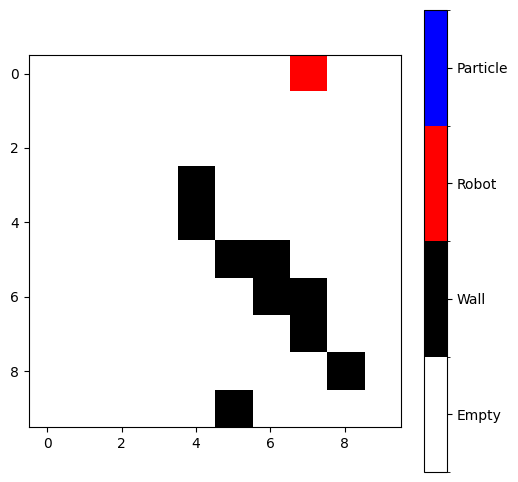

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Convert environment to a numerical format for plotting
env_numeric = [[0 if cell == 'E' else 1 if cell == 'W' else 2 for cell in row] for row in ENV]

# Create a color map to represent different cell types
cmap = plt.cm.colors.ListedColormap(['white', 'black', 'red', 'blue'])
bounds = [0,1,2,3,4]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# plot the particles

for particle in particles:
    env_numeric[particle[0]][particle[1]] = 3

print("env_numeric", env_numeric)

# Plot the environment
plt.figure(figsize=(6,6))
plt.imshow(env_numeric, cmap=cmap, norm=norm)

# Add a color bar
cbar = plt.colorbar()
cbar.set_ticks([0.5, 1.5, 2.5, 3.5])
cbar.set_ticklabels(['Empty', 'Wall', 'Robot', 'Particle'])

plt.show()

## Funtion of random movement of the robot

In [9]:
def random_move():
    return np.random.choice(['up', 'down', 'left', 'right'])

def move_robot(env, robot_pos_old, action):
    # Get the current position of the robot
    row, col = robot_pos_old

    # the rorobt takes intended action wiht prob 0.8 and any unintended acction with probabiltuy 0.05
    if random.random() < TRANSITION_PROBABILITY_CORRECT:
        action = action
    elif random.random() < TRANSITION_PROBABILITY_NOISE:
        while random_move() == action:
            action = random_move()

    # Move the robot according to the action
    if action == 'up':
        row -= 1
    elif action == 'down':
        row += 1
    elif action == 'left':
        col -= 1
    elif action == 'right':
        col += 1
    elif action == 'up-left':
        row -= 1
        col -= 1
    elif action == 'up-right':
        row -= 1
        col += 1
    elif action == 'down-left':
        row += 1
        col -= 1
    elif action == 'down-right':
        row += 1
        col += 1
    else:
        raise ValueError('Invalid action.')

    # Check if the new position is valid
    if row < 0 or row >= len(env) or col < 0 or col >= len(env[0]):
        return robot_pos_old, False

    # Check if the new position is a wall
    if env[row][col] == 'W':
        return (row, col), False

    # Return the new position
    return (row, col), True

## Funtion to calculate the likelihood of the particles

In [10]:
def likelyhood(particle, robot_pos):
    """ Uses 8 nearest neighbours to calculate the likelyhood of a particle """
    # Get the current position of the particle
    row, col = particle

    # 8 directions
    directions = ['up', 'down', 'left', 'right', 'up-left', 'up-right', 'down-left', 'down-right']

    # Calculate number of similar neighbours
    similar = 0
    for direction in directions:
        # Get the position of the neighbour
        neighbour_particle,_ = move_robot(ENV, particle, direction)
        neighbour_robot,_ = move_robot(ENV, robot_pos, direction)

        # if any of the neighbour is same as the robot or particle as their original position then continue
        if neighbour_particle == particle or neighbour_robot == robot_pos:
            continue

        # Check if the neighbour is same as the robot
        if ENV[neighbour_particle[0]][neighbour_particle[1]] == ENV[neighbour_robot[0]][neighbour_robot[1]]:
            similar += 1
            

    # Return the likelyhood
    return similar / len(directions)

## Get weights of the particles

In [11]:
def update_weights(robot_pos, particles, weights):
    for i in range(PARTICLE_COUNT):
        # print("robot_pos", robot_pos)
        weights[i] = likelyhood(particles[i], robot_pos)



## Funtion to resample the particles

In [12]:
def resample(particles, weights, estimated_zone):
    # Resample the particles
    new_particles = []
    new_weights = []
    new_estimated_zone = [0] * 9 # 9 zones

    # print("weights", weights, len(weights))
    # print("particles count", PARTICLE_COUNT) 

    # normalize the weights
    weights = weights / np.sum(weights)

    for i in range(PARTICLE_COUNT):
        new_particles.append(particles[np.random.choice(range(PARTICLE_COUNT), p=weights)])
        new_weights.append(1/PARTICLE_COUNT)
        # new_estimated_zone.append(0)
    return new_particles, new_weights, new_estimated_zone

## Funtion to plot the heatmap 

In [13]:
def plot_particles(particles, weights, estimated_zone, robot_pos):
    # Convert environment to a numerical format for plotting
    env_numeric = [[0 if cell == 'E' else 1 if cell == 'W' else 0 for cell in row] for row in ENV]

    # Create a color map to represent different cell types
    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0,1,2,3,4]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    print("ENV", ENV)

    # plot the particles

    for particle in particles:
        env_numeric[particle[0]][particle[1]] = 3

    # robot position
    env_numeric[robot_pos[0]][robot_pos[1]] = 2

    # Plot the environment
    plt.figure(figsize=(6,6))
    plt.imshow(env_numeric, cmap=cmap, norm=norm)

    # Add a color bar
    cbar = plt.colorbar()
    cbar.set_ticks([0.5, 1.5, 2.5, 3.5])
    cbar.set_ticklabels(['Empty', 'Wall', 'Robot', 'Particle'])

    plt.show()

# heatmap of grid of probabilities, higher the probability, higher the intensity of color
def heatmap_prob(ZONE, estimated_zone):
    # weight of each zone
    zone_weight = [[0 for i in range(len(ZONE[0]))] for j in range(len(ZONE))]
    # print("zone_weight", zone_weight)
    
    for i in range(len(ZONE)):
        for j in range(len(ZONE[0])):
            # print("ZONE[i][j]", ZONE[i][j])
            zone_weight[i][j] = estimated_zone[int(ZONE[i][j])-1]

    # print("zone_weight", zone_weight)

    # we need to plot a heatmap, so we need to convert the zone_weight to a numpy array. Higher the probability, higher the intensity of color, shade of blue
    zone_weight = np.array(zone_weight)
    # print("zone_weight", zone_weight)

    # plot the heatmap
    plt.figure(figsize=(6,6))
    plt.imshow(zone_weight, cmap='Blues')

    # Add a color bar
    cbar = plt.colorbar()
    cbar.set_ticks([0, 9])
    cbar.set_ticklabels(['Low', 'High'])

    plt.show()
    
    
    
    
    

## Main function

In [14]:
def get_robot_zone(robot_pos):
    return ZONE[robot_pos[0]][robot_pos[1]]

def get_robot_position(ENV):
    for i in range(len(ENV)):
        for j in range(len(ENV[0])):
            if ENV[i][j] == 'S':
                return (i, j)
                
def main():
    # Generate the particles
    particles, weights, estimated_zone = generate_particles()
    print("particles", particles, len(particles))
    print("weights", weights, len(weights))
    print("estimated_zone", estimated_zone, len(estimated_zone))
    print("PARTICLE_COUNT", PARTICLE_COUNT)
    print("robot_pos", get_robot_position(ENV))
    # Generate the robot position
    robot_pos = get_robot_position(ENV)

    print("ENV", ENV)

    # Iterate for MAX_ITERATIONS
    for iteration in range(MAX_ITERATIONS+1):

        # ENV[robot_pos[0]][robot_pos[1]] = 'E'

        # Move the robot
        # print("robot_pos old", robot_pos)
        robot_pos_old = robot_pos
        robot_move = random_move()
        robot_pos, valid = move_robot(ENV, robot_pos, robot_move)
        # print("robot_pos", robot_pos)
        # print("valid", valid)
        # update the position of the robot in ENV
        # ENV[robot_pos[0]][robot_pos[1]] = 'S'

        # If the robot is not in a valid position then continue
        if not valid:
            # ENV[robot_pos[0]][robot_pos[1]] = 'E'
            # ENV[robot_pos_old[0]][robot_pos_old[1]] = 'S'
            continue

        

        # move the particles with the robot
        for i in range(PARTICLE_COUNT):
            particle_pos_old = particles[i]
            particles_new, valid = move_robot(ENV, particles[i], robot_move)
            if valid:
                # ENV[particle_pos_old[0]][particle_pos_old[1]] = 'E'
                # ENV[particles[i][0]][particles[i][1]] = 'P'
                particles[i] = particles_new
    
            

        # Update the weights
        update_weights(robot_pos, particles, weights)

        # estimate the zone
        # nuber of particles in each zone
        num_particles_in_zone = [0] * 9 # 9 zones
        estimated_zone = [0] * 9 # 9 zones
        # print("particles intial", particles)
        # print("weights intial", weights)
        # print("estimated_zone intial", estimated_zone)
        for i in range(PARTICLE_COUNT):
            zone_of_particle = ZONE[particles[i][0]][particles[i][1]]
            # print("zone_of_particle", zone_of_particle)
            # print("weights[i]", weights[i])
            estimated_zone[int(zone_of_particle)-1] += weights[i]
            num_particles_in_zone[int(zone_of_particle)-1] += 1

        # divide by number of particles in each zone
        for i in range(len(estimated_zone)):
            if num_particles_in_zone[i] != 0:
                estimated_zone[i] /= num_particles_in_zone[i]


        # Resample the particles if the robot has moved ZONE_ESTIMATION_TIME times
        if iteration % ZONE_ESTIMATION_TIME == 0:
            # print("iteratoin", iteration)
            plot_particles(particles, weights, estimated_zone, robot_pos)
            # print("weights", weights)
            # print("estimated_zone", estimated_zone)

            # Plot the heatmap of probabilities
            heatmap_prob(ZONE, estimated_zone)

            particles, weights, _ = resample(particles, weights, estimated_zone)
            # print("particles", particles)
            # print("zone after resampling", estimated_zone)

        print("particles", particles)
        print("weights", weights)
        print("robot_pos", robot_pos)
        print("iteration", iteration, "\n\n")
            
    # Return the estimated zone
    return estimated_zone,robot_pos

particles [[4, 2], [2, 6], [9, 2], [3, 5], [6, 8]] 5
weights [0.2, 0.2, 0.2, 0.2, 0.2] 5
estimated_zone [0, 0, 0, 0, 0, 0, 0, 0, 0] 9
PARTICLE_COUNT 5
robot_pos (0, 7)
ENV [['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E'], ['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']]
ENV [['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', '

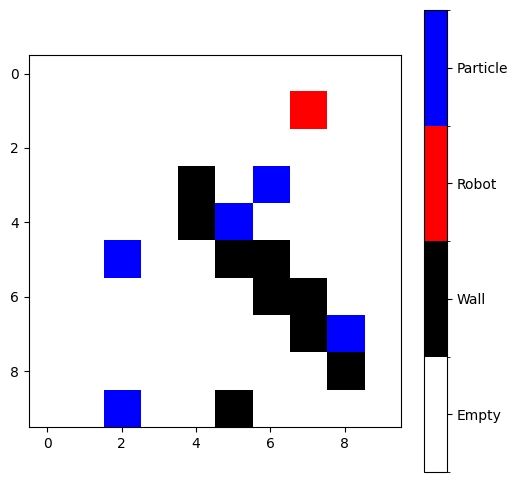

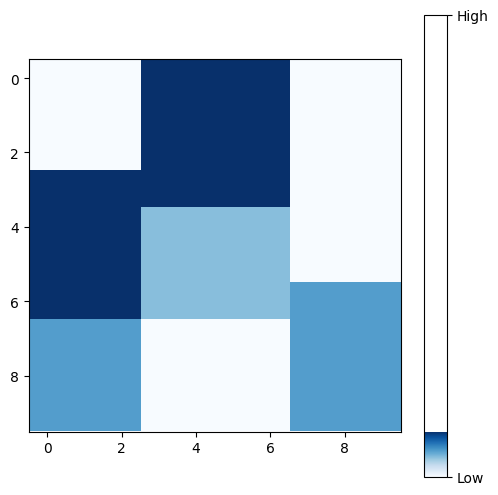

particles [(3, 6), (3, 6), (4, 5), (5, 2), (4, 5)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (1, 7)
iteration 0 


particles [(3, 5), (3, 5), (4, 5), (5, 1), (4, 5)]
weights [0.625, 0.625, 0.375, 0.875, 0.375]
robot_pos (1, 6)
iteration 1 


particles [(3, 6), (3, 6), (4, 6), (5, 2), (4, 6)]
weights [0.875, 0.875, 0.625, 0.875, 0.625]
robot_pos (1, 7)
iteration 2 


particles [(3, 7), (3, 7), (4, 7), (5, 3), (4, 7)]
weights [0.875, 0.875, 0.75, 0.75, 0.75]
robot_pos (1, 8)
iteration 3 


particles [(3, 8), (3, 8), (4, 8), (5, 4), (4, 8)]
weights [0.625, 0.625, 0.625, 0.5, 0.625]
robot_pos (1, 9)
iteration 4 


particles [(2, 8), (2, 8), (3, 8), (5, 4), (3, 8)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (0, 9)
iteration 5 


ENV [['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E',

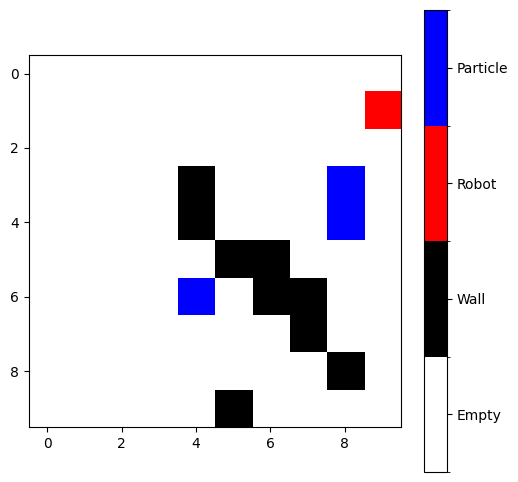

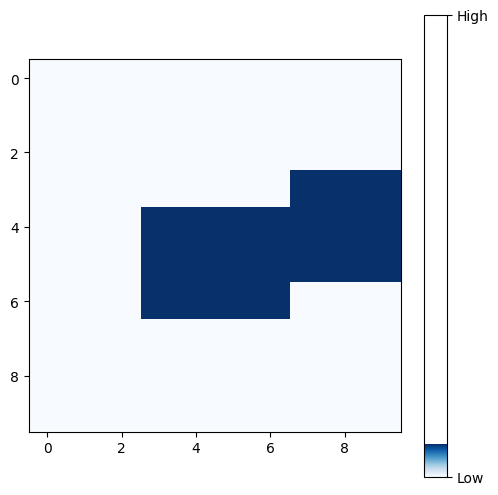

particles [(6, 4), (3, 8), (4, 8), (6, 4), (4, 8)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (1, 9)
iteration 10 


particles [(5, 4), (2, 8), (3, 8), (5, 4), (3, 8)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (0, 9)
iteration 11 


particles [(6, 4), (3, 8), (4, 8), (6, 4), (4, 8)]
weights [0.625, 0.625, 0.625, 0.625, 0.625]
robot_pos (1, 9)
iteration 12 


particles [(5, 4), (2, 8), (3, 8), (5, 4), (3, 8)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (0, 9)
iteration 13 


particles [(5, 3), (2, 7), (3, 7), (5, 3), (3, 7)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (0, 8)
iteration 16 


particles [(5, 2), (2, 6), (3, 6), (5, 2), (3, 6)]
weights [0.625, 0.625, 0.625, 0.625, 0.625]
robot_pos (0, 7)
iteration 17 


particles [(5, 1), (2, 5), (3, 5), (5, 1), (3, 5)]
weights [0.5, 0.375, 0.25, 0.5, 0.25]
robot_pos (0, 6)
iteration 18 


particles [(5, 2), (2, 6), (3, 6), (5, 2), (3, 6)]
weights [0.625, 0.625, 0.625, 0.625, 0.625]
robot_pos (0, 7)
iteration 19 


EN

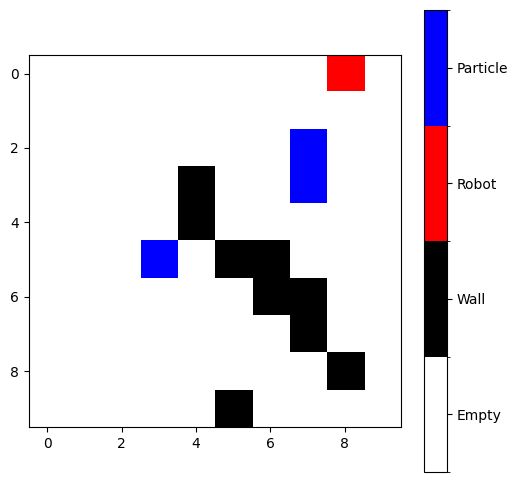

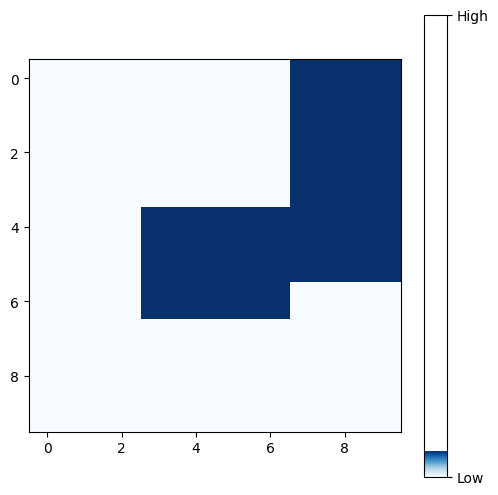

particles [(3, 7), (3, 7), (2, 7), (5, 3), (3, 7)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (0, 8)
iteration 20 


particles [(3, 8), (3, 8), (2, 8), (5, 4), (3, 8)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (0, 9)
iteration 22 


particles [(3, 7), (3, 7), (2, 7), (5, 3), (3, 7)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (0, 8)
iteration 23 


particles [(3, 8), (3, 8), (2, 8), (5, 4), (3, 8)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (0, 9)
iteration 24 


particles [(3, 7), (3, 7), (2, 7), (5, 3), (3, 7)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (0, 8)
iteration 25 


particles [(3, 6), (3, 6), (2, 6), (5, 2), (3, 6)]
weights [0.625, 0.625, 0.625, 0.625, 0.625]
robot_pos (0, 7)
iteration 26 


particles [(4, 6), (4, 6), (3, 6), (6, 2), (4, 6)]
weights [0.625, 0.625, 0.875, 0.875, 0.625]
robot_pos (1, 7)
iteration 27 


particles [(4, 5), (4, 5), (3, 5), (6, 1), (4, 5)]
weights [0.375, 0.375, 0.625, 0.875, 0.375]
robot_pos (1, 6)
iteration 28 


partic

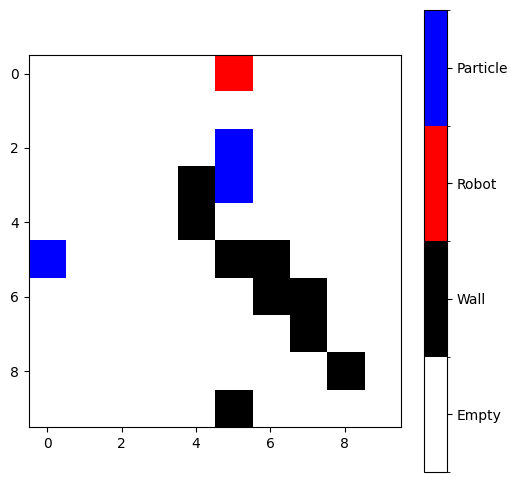

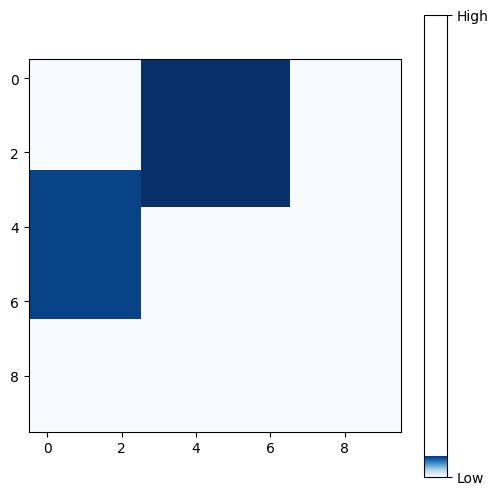

particles [(2, 5), (2, 5), (3, 5), (2, 5), (3, 5)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (0, 5)
iteration 30 


particles [(3, 5), (3, 5), (4, 5), (3, 5), (4, 5)]
weights [0.75, 0.75, 0.5, 0.75, 0.5]
robot_pos (1, 5)
iteration 31 


particles [(4, 5), (4, 5), (4, 5), (4, 5), (4, 5)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (2, 5)
iteration 32 


particles [(4, 6), (4, 6), (4, 6), (4, 6), (4, 6)]
weights [0.75, 0.75, 0.75, 0.75, 0.75]
robot_pos (2, 6)
iteration 33 


particles [(4, 5), (4, 5), (4, 5), (4, 5), (4, 5)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (2, 5)
iteration 34 


particles [(3, 5), (3, 5), (3, 5), (3, 5), (3, 5)]
weights [0.75, 0.75, 0.75, 0.75, 0.75]
robot_pos (1, 5)
iteration 35 


particles [(4, 5), (4, 5), (4, 5), (4, 5), (4, 5)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (2, 5)
iteration 36 


particles [(4, 5), (4, 5), (4, 5), (4, 5), (4, 5)]
weights [0.625, 0.625, 0.625, 0.625, 0.625]
robot_pos (2, 4)
iteration 37 


par

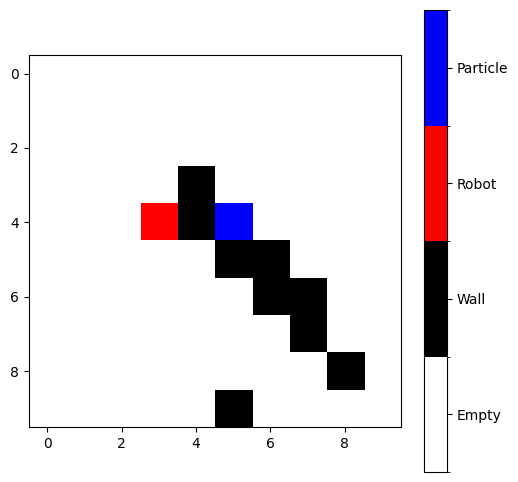

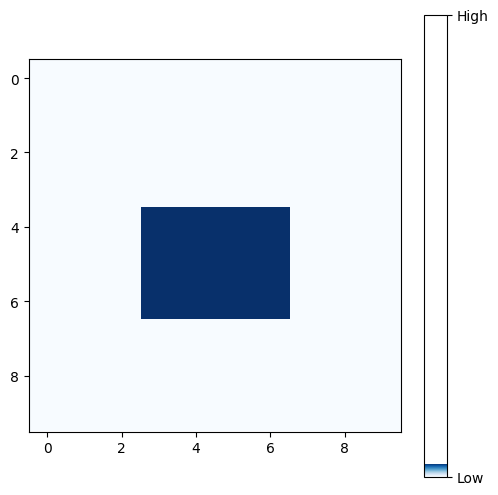

particles [(4, 5), (4, 5), (4, 5), (4, 5), (4, 5)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (4, 3)
iteration 40 


particles [(4, 6), (4, 6), (4, 6), (4, 6), (4, 6)]
weights [0.75, 0.75, 0.75, 0.75, 0.75]
robot_pos (3, 5)
iteration 43 


particles [(4, 7), (4, 7), (4, 7), (4, 7), (4, 7)]
weights [0.875, 0.875, 0.875, 0.875, 0.875]
robot_pos (3, 5)
iteration 45 


particles [(3, 7), (3, 7), (3, 7), (3, 7), (3, 7)]
weights [0.875, 0.875, 0.875, 0.875, 0.875]
robot_pos (2, 5)
iteration 46 


particles [(3, 8), (3, 8), (3, 8), (3, 8), (3, 8)]
weights [1.0, 1.0, 1.0, 1.0, 1.0]
robot_pos (2, 6)
iteration 47 


particles [(3, 9), (3, 9), (3, 9), (3, 9), (3, 9)]
weights [0.625, 0.625, 0.625, 0.625, 0.625]
robot_pos (2, 7)
iteration 48 


particles [(3, 8), (3, 8), (3, 8), (3, 8), (3, 8)]
weights [1.0, 1.0, 1.0, 1.0, 1.0]
robot_pos (2, 6)
iteration 49 


ENV [['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E',

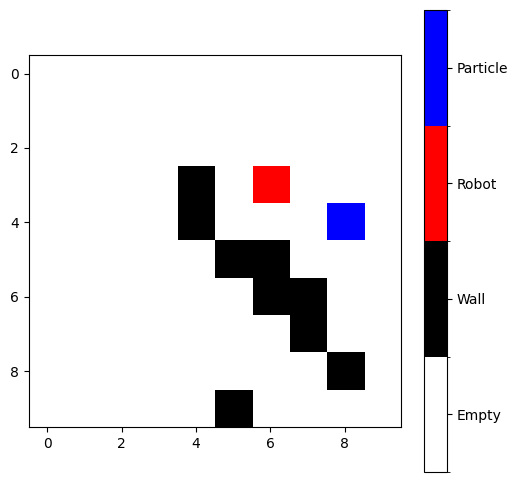

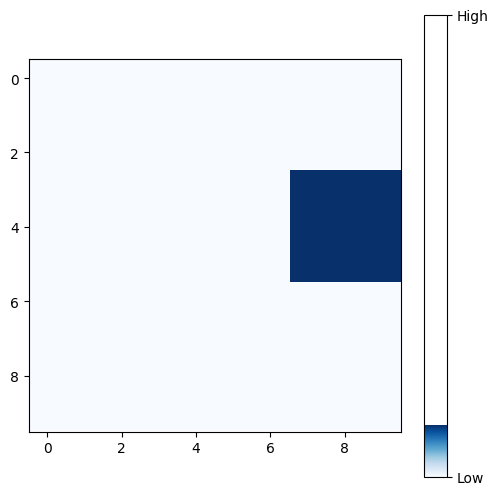

particles [(4, 8), (4, 8), (4, 8), (4, 8), (4, 8)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (3, 6)
iteration 50 


particles [(4, 9), (4, 9), (4, 9), (4, 9), (4, 9)]
weights [0.625, 0.625, 0.625, 0.625, 0.625]
robot_pos (3, 7)
iteration 51 


particles [(5, 9), (5, 9), (5, 9), (5, 9), (5, 9)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (4, 7)
iteration 52 


particles [(5, 8), (5, 8), (5, 8), (5, 8), (5, 8)]
weights [0.875, 0.875, 0.875, 0.875, 0.875]
robot_pos (4, 6)
iteration 53 


particles [(5, 7), (5, 7), (5, 7), (5, 7), (5, 7)]
weights [0.625, 0.625, 0.625, 0.625, 0.625]
robot_pos (4, 5)
iteration 54 


particles [(4, 7), (4, 7), (4, 7), (4, 7), (4, 7)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (4, 5)
iteration 56 


particles [(4, 8), (4, 8), (4, 8), (4, 8), (4, 8)]
weights [0.75, 0.75, 0.75, 0.75, 0.75]
robot_pos (4, 6)
iteration 57 


particles [(3, 8), (3, 8), (3, 8), (3, 8), (3, 8)]
weights [1.0, 1.0, 1.0, 1.0, 1.0]
robot_pos (3, 6)
iteration 58 


particles [

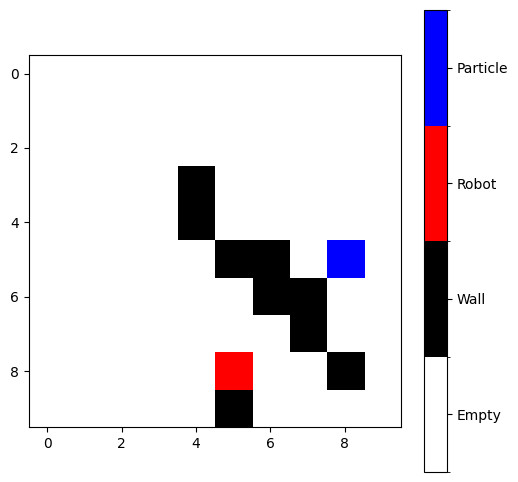

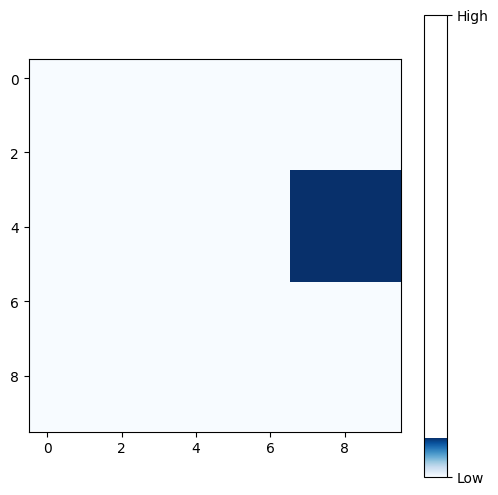

particles [(5, 8), (5, 8), (5, 8), (5, 8), (5, 8)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (8, 5)
iteration 70 


particles [(4, 8), (4, 8), (4, 8), (4, 8), (4, 8)]
weights [0.875, 0.875, 0.875, 0.875, 0.875]
robot_pos (7, 5)
iteration 71 


particles [(4, 9), (4, 9), (4, 9), (4, 9), (4, 9)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (7, 6)
iteration 72 


particles [(5, 9), (5, 9), (5, 9), (5, 9), (5, 9)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (8, 6)
iteration 73 


particles [(4, 9), (4, 9), (4, 9), (4, 9), (4, 9)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (7, 6)
iteration 74 


particles [(4, 8), (4, 8), (4, 8), (4, 8), (4, 8)]
weights [0.875, 0.875, 0.875, 0.875, 0.875]
robot_pos (7, 5)
iteration 75 


particles [(5, 8), (5, 8), (5, 8), (5, 8), (5, 8)]
weights [0.75, 0.75, 0.75, 0.75, 0.75]
robot_pos (8, 5)
iteration 76 


particles [(5, 9), (5, 9), (5, 9), (5, 9), (5, 9)]
weights [0.5, 0.5, 0.5, 0.5, 0.625]
robot_pos (8, 6)
iteration 77 


particles [(4, 9), (4, 9), (4

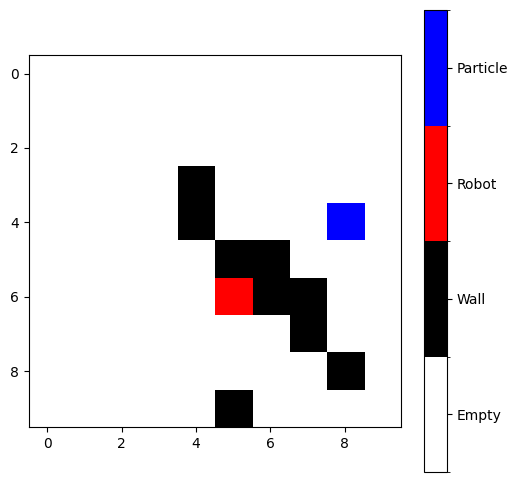

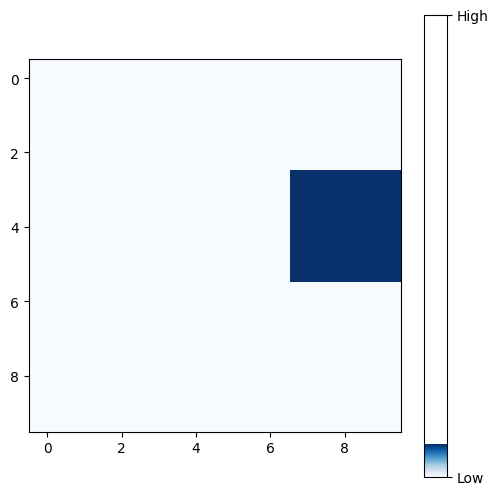

particles [(4, 8), (4, 8), (4, 8), (4, 8), (4, 8)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (6, 5)
iteration 80 


particles [(5, 8), (5, 8), (5, 8), (5, 8), (5, 8)]
weights [0.75, 0.75, 0.75, 0.75, 0.75]
robot_pos (7, 5)
iteration 81 


particles [(5, 9), (5, 9), (5, 9), (5, 9), (5, 9)]
weights [0.5, 0.5, 0.5, 0.5, 0.375]
robot_pos (7, 6)
iteration 82 


particles [(6, 9), (6, 9), (6, 9), (6, 9), (6, 9)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (8, 6)
iteration 83 


particles [(6, 9), (6, 9), (6, 9), (6, 9), (6, 9)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (8, 7)
iteration 84 


particles [(6, 9), (6, 9), (6, 9), (6, 9), (6, 9)]
weights [0.25, 0.25, 0.25, 0.25, 0.25]
robot_pos (7, 8)
iteration 86 


particles [(6, 9), (6, 9), (6, 9), (6, 9), (6, 9)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (6, 8)
iteration 89 


ENV [['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E

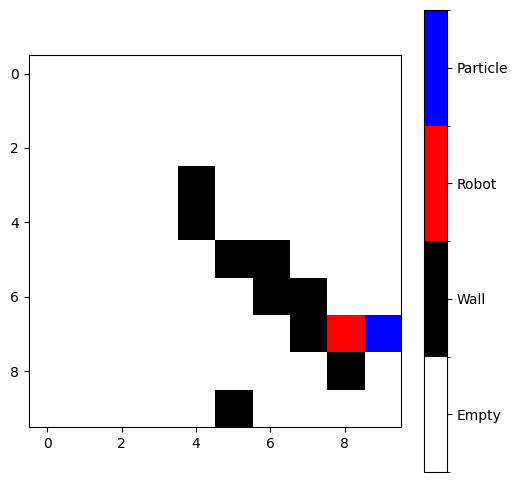

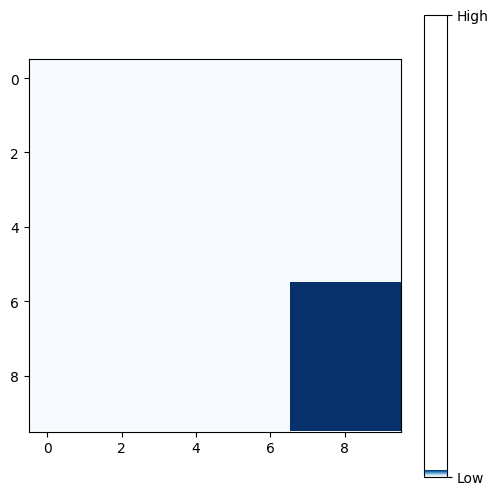

particles [(7, 9), (7, 9), (7, 9), (7, 9), (7, 9)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (7, 8)
iteration 90 


particles [(8, 9), (8, 9), (8, 9), (8, 9), (8, 9)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (8, 7)
iteration 92 


particles [(9, 9), (9, 9), (9, 9), (9, 9), (9, 9)]
weights [0.125, 0.125, 0.125, 0.125, 0.125]
robot_pos (9, 8)
iteration 94 


particles [(9, 8), (9, 8), (9, 8), (9, 8), (9, 8)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (9, 7)
iteration 95 


particles [(9, 7), (9, 7), (9, 7), (9, 7), (9, 7)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (9, 6)
iteration 96 


particles [(9, 8), (9, 8), (9, 8), (9, 8), (9, 8)]
weights [0.375, 0.375, 0.375, 0.375, 0.375]
robot_pos (9, 7)
iteration 97 


particles [(9, 8), (9, 8), (9, 8), (9, 8), (9, 8)]
weights [0.5, 0.5, 0.5, 0.5, 0.5]
robot_pos (8, 7)
iteration 98 


ENV [['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['E', 'E', 'E',

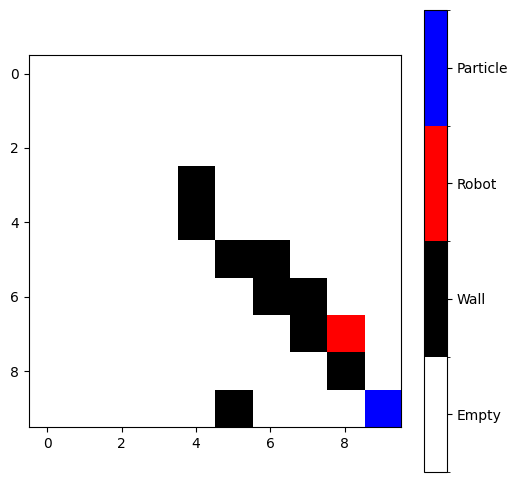

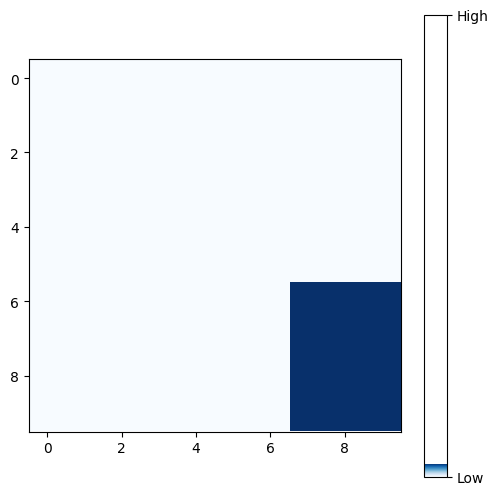

particles [(9, 9), (9, 9), (9, 9), (9, 9), (9, 9)]
weights [0.2, 0.2, 0.2, 0.2, 0.2]
robot_pos (7, 8)
iteration 100 


Estimated Zone 9
Actual Zone 9


In [15]:
zone_estimation,robot_pos = main()

zone_estimation = np.array(zone_estimation)
zone_estimated = np.argmax(zone_estimation) + 1

print("Estimated Zone", zone_estimated)
print("Actual Zone", get_robot_zone(robot_pos))

# Question 3: X-Men MDP

Most of the X-Men are mutants, a subspecies of humans who are born with superhuman abilities activated by the "X-Gene". The X-Men fight for peace and equality between normal humans and mutants in a world where anti-mutant bigotry is fierce and widespread. They are led by Charles Xavier, also known as Professor X, a powerful mutant telepath who can control and read minds. Their archenemy is Magneto, a powerful mutant with the ability to manipulate and control magnetic fields who leads the Brotherhood of Mutants. Both have opposing views and philosophies regarding the relationship between mutants and humans. While the former works towards peace and understanding between mutants and humans, the latter views humans as a threat and believes in taking an aggressive approach against them.

Jean Grey is one of the most beloved X-Men. But when a mission goes wrong, Jean is exposed to a dark and ancient power. This power has destroyed everything it comes in contact with, until her. Now that this power is becoming unstable, she releases it with destruction and anger. Now that this foreign power is consuming her, and the world is threatened, the X-Men have to face an important truth: they must save either the world, or their friend who threatens it. Magneto calls her ‘The phoenix’ and intends to use her to declare war against humanity.

In this question, you will use some algorithms to compute optimal policies in Markov decision processes (MDP’s) to help wolverine escape from Magneto while trying to find Jean in order to kill her.

You are given the following grid world where Wolverine and other mutants from Xavier's School for Gifted Youngsters live along with Magneto and his brotherhood of mutants.




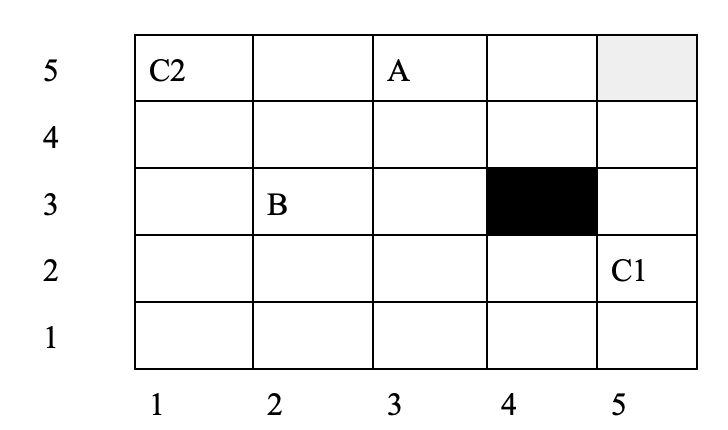

The wolverine (A) can occupy any of the 24 blank squares. The Magneto (B) also can occupy any square, except for square (5,5) which is Xavier’s school of Gifted Youngsters. Jean which can be at C1(5,2) or C2(1,5). Currently, she is at (5,2). Thus, MDP has 24*23*2 = 1104 states.

Wolverine and Magneto can each move one square in any direction - Up,down,left and right but not diagonal. They also can choose not to move at all. (4,3) is blocked due to the wall. Thus, there are 5 possible moves from each square. If an action is attempted that causes the characters(Wolverine and Magneto) to bump into a wall, then simply stay at the same location. In this problem, we will always take the point of view of the wolverine.

Reward Policies:

When Wolverine is at Jean’s place, it receives a reward of +20.
When Magneto is at Wolverine’s place, Wolverine receives a reward of -20.
When the Magneto is at wolverine’s place and wolverine is at jean’s place, the reward is -15.

All other configurations have a reward of 0.
Thus, the wolverine is trying to kill Jean while simultaneously avoiding the Magneto.

Jean is always available in exactly one of the two locations listed above. At every time step, Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.

States are encoded as six tuples, the first two numbers indicating the position of Magneto, the second two numbers the position of Wolverine, and the last two numbers the position of Jean. Thus, 2:3:3:5:5:2 indicates, as depicted in the figure above, that Magneto is in (2,3), Wolverine is in (3,5), and Jean is in (5,2). Magneto and wolverine take alternate moves. However, in encoding the MDP, we collapse both moves into a single state transition. In addition, Jean, when she moves, does so simultaneously with the wolverine's move. For instance, from the configuration above, if the wolverine moves to (2,5) and the Magneto responds by moving to (2,4), while jean moves to (1,5), this all would be encoded as a single transition from state 2:3:3:5:5:2 to 2:4:2:5:1:5.

The Wolverine and Magneto have 4 actions available ('UP', 'RIGHT', 'DOWN' and 'LEFT'). Each action moves the Wolverine/Magneto in its direction with probability 0.95. When the wolverine tries to move outside of the grid, the action will have no effect with probability 1. Staying in its own state will happen with probability 0.05.

We will consider two versions of Magneto:

In first version, Magneto is dumb and lazy, simply wanders randomly around its environment choosing randomly among its available actions at every step.
In the second version, Magneto is intelligent and active. Here, Magneto always heads straight for wolverine following the shortest path possible. Thus, after wolverine makes its move, Magneto chooses the action that will move it as close as possible to the wolverine's new position. (If there is a tie among the Magneto's best available options, the Magneto chooses randomly among these equally good best actions.)
    
For both versions of Magneto, your job will be to compute the wolverine's optimal policy, i.e. the action that should be taken at each state to maximize the wolverine's expected discounted reward, where we fix the discount factor (gamma) to be 0.85.

**Task 1:** Implement value iteration for both versions of Magneto on MDP [10 points]

**Task 2:** Implement policy iteration for both versions of Magneto [10 points]

**Task 3:** Implement and visualize the MDP board and strategy (policy) graphically [10 points]

**Task 4:** Compare the results for all the four approaches - Value iteration for lazy Magneto, Value iteration for active Magneto, Policy iteration for lazy Magneto, Policy iteration for active Magneto with proper tables/graphs/statistics. Comment which one is best among all the four mentioned approaches. [10 points]



## Intializing Environment

In [16]:
GRID = np.zeros((5, 5))

# enum where 0 represent jeans, 1 represent wolverine, 2 represent magneto
class MUTANTS:
    JEANS = 1
    WOLVERINE = 2
    MAGNETO = 3

Xavier_School = (4, 4)
C1 = (4, 1)
C2 = (0, 4)
JEAN_POS = C1
MAGNETO_POS = (1, 2)
WOLVERINE_POS = (2, 4)
WALL_POS = (3, 2)

START_STATE = (JEAN_POS, MAGNETO_POS, WOLVERINE_POS)

GRID[3][2] = -1 # wall
GRID[JEAN_POS[0]][JEAN_POS[1]] = MUTANTS.JEANS
GRID[MAGNETO_POS[0]][MAGNETO_POS[1]] = MUTANTS.MAGNETO
GRID[WOLVERINE_POS[0]][WOLVERINE_POS[1]] = MUTANTS.WOLVERINE

# reward for each state
# REWARD = np.zeros((5, 5))

# transition probabilities
# TRANSITION_PROB = np.zeros((5, 5))
TRANSITION_PROB_CORRECT = 0.95
TRANSITION_PROB_STAY = 0.05

# discount factor
GAMMA = 0.85

# actions
ACTIONS = ['UP', 'RIGHT', 'DOWN', 'LEFT']
ACTIONS_MAP = {
    'UP': 0,
    'RIGHT': 1,
    'DOWN': 2,
    'LEFT': 3
}

ITERATIONS = 100


print(GRID)
print(START_STATE)

    

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  3.  0.  0.]
 [ 0.  0.  0.  0.  2.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  1.  0.  0.  0.]]
((4, 1), (1, 2), (2, 4))


In [17]:
def get_intial_policy():
    policy = np.zeros((2, 5, 5, 5, 5), dtype=int)

    for i in range(2):
        for j in range(5):
            for k in range(5):
                for l in range(5):
                    for m in range(5):
                        for n in range(5):
                            policy[i][k][l][m][n] = np.random.choice(list(ACTIONS_MAP.values()))
                            
    return policy

#  MDP has 24*23*2 = 1104 states
# START_STATE = (JEAN_POS, MAGNETO_POS, WOLVERINE_POS)
def get_intial_value():
    value = np.zeros((5, 5, 5, 5, 5))
    return value

def get_intial_state_value():
    state_value = START_STATE
    return state_value

def get_intial_q_value():
    q_value = np.zeros((5, 5, 5, 5, 5, 4))
    return q_value

def get_grid():
    return GRID
    

### Helper funtions

In [18]:
def get_new_position(i,j,action):

    old_i = i
    old_j = j

    if action == 'UP':
        i -= 1
    elif action == 'DOWN':
        i += 1
    elif action == 'LEFT':
        j -= 1
    elif action == 'RIGHT':
        j += 1


        
    return i, j


def get_new_position_closest_to_wolverine(i,j,wolverine_i, wolverine_j):

    old_i = i
    old_j = j

    if i > wolverine_i:
        i -= 1
    elif i < wolverine_i:
        i += 1
    elif j > wolverine_j:
        j -= 1
    elif j < wolverine_j:
        j += 1

    return i, j

### Task 1

#### Value iteration for Magneto

In [19]:


def value_interation_lazy():
    value = get_intial_value()
    policy = get_intial_policy()

    for _ in range(ITERATIONS):
        delta = 0
        # Jean is either at c1 or c2
        # The wolverine (A) can occupy any of the 24 blank squares. The Magneto (B) also can occupy any square, except for square (5,5)
        for i in range(2):
            # i=0 means jean is at c1
            # i=1 means jean is at c2
                for k in range(5):
                    for l in range(5):
                        for m in range(5):
                            for n in range(5):
                                old_value = value[i][k][l][m][n]
                                new_value = 0
                                for action in ACTIONS:
                                    new_wolverine_i, new_wolverine_j = get_new_position(m, n, action)
                                    # random move for magneto
                                    new_magneto_i, new_magneto_j = get_new_position(k, l, random_move().upper())
                                    # Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.
                                    JEAN_POS = C1 if i == 0 else C2
                                    JEAN_POS_2 = C2 if i == 0 else C1

                                    # if any of the character is at wall then stay at the same position
                                    is_wolverine_at_wall = new_wolverine_i == WALL_POS[0] and new_wolverine_j == WALL_POS[1]
                                    is_magneto_at_wall = new_magneto_i == WALL_POS[0] and new_magneto_j == WALL_POS[1]
                                    if is_wolverine_at_wall:
                                        new_wolverine_i, new_wolverine_j = m, n
                                    if is_magneto_at_wall:
                                        new_magneto_i, new_magneto_j = k, l

                                    # if the new position is out of grid then stay at the same position
                                    is_wolverine_out_of_grid = False
                                    is_magneto_out_of_grid = False
                                    if new_wolverine_i < 0 or new_wolverine_i >= 5 or new_wolverine_j < 0 or new_wolverine_j >= 5:
                                        new_wolverine_i, new_wolverine_j = m, n
                                        is_wolverine_out_of_grid = True
                                    if new_magneto_i < 0 or new_magneto_i >= 5 or new_magneto_j < 0 or new_magneto_j >= 5:
                                        new_magneto_i, new_magneto_j = k, l
                                        is_magneto_out_of_grid = True


                                    # reward for the current state
                                    reward = 0
                                    current_value = 0
                                    if (m, n) == JEAN_POS and (k, l) == (m, n): # wolverine is at jean's place and magneto is at wolverine's place
                                        reward = -15 
                                    elif (m, n) == JEAN_POS: # wolverine is at jean's place
                                        reward = 20
                                    elif (k, l) == (m, n): # magneto is at wolverine's place
                                        reward = -20
                                    else:
                                        if is_wolverine_out_of_grid or is_magneto_out_of_grid:
                                            current_value += 0.8 * 1 * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * 1 * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        else:
                                            current_value += 0.8 * TRANSITION_PROB_CORRECT * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * TRANSITION_PROB_CORRECT * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.8 * TRANSITION_PROB_STAY * value[i][k][l][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * TRANSITION_PROB_STAY * value[1-i][k][l][new_wolverine_i][new_wolverine_j]

                                    current_value = reward + GAMMA * current_value

                                    if current_value > new_value:
                                        new_value = current_value
                                        policy[i][k][l][m][n] = ACTIONS_MAP[action]
                                value[i][k][l][m][n] = new_value
                                delta = max(delta, abs(old_value - new_value))

        if delta < 0.0001:
            break


    return value, policy

def value_interation_active():
    # in this magneto is intelligent and active. Here, Magneto always heads straight for wolverine following the shortest path possible. Thus, after wolverine makes its move, Magneto chooses the action that will move it as close as possible to the wolverine's new position. (If there is a tie among the Magneto's best available options, the Magneto chooses randomly among these equally good best actions.)
    # rest is same as lazy magneto
    value = get_intial_value()
    policy = get_intial_policy()

    for _ in range(ITERATIONS):
        delta = 0
        # Jean is either at c1 or c2
        # The wolverine (A) can occupy any of the 24 blank squares. The Magneto (B) also can occupy any square, except for square (5,5)
        for i in range(2):
            # i=0 means jean is at c1
            # i=1 means jean is at c2
                for k in range(5):
                    for l in range(5):
                        for m in range(5):
                            for n in range(5):
                                old_value = value[i][k][l][m][n]
                                new_value = 0
                                for action in ACTIONS:
                                    new_wolverine_i, new_wolverine_j = get_new_position(m, n, action)
                                    # random move for magneto
                                    new_magneto_i, new_magneto_j = get_new_position_closest_to_wolverine(k, l, new_wolverine_i, new_wolverine_j)
                                    # Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.
                                    JEAN_POS = C1 if i == 0 else C2
                                    JEAN_POS_2 = C2 if i == 0 else C1

                                    # if any of the character is at wall then stay at the same position
                                    is_wolverine_at_wall = new_wolverine_i == WALL_POS[0] and new_wolverine_j == WALL_POS[1]
                                    is_magneto_at_wall = new_magneto_i == WALL_POS[0] and new_magneto_j == WALL_POS[1]
                                    if is_wolverine_at_wall:
                                        new_wolverine_i, new_wolverine_j = m, n
                                    if is_magneto_at_wall:
                                        new_magneto_i, new_magneto_j = k, l

                                    # if the new position is out of grid then stay at the same position
                                    is_wolverine_out_of_grid = False
                                    is_magneto_out_of_grid = False
                                    if new_wolverine_i < 0 or new_wolverine_i >= 5 or new_wolverine_j < 0 or new_wolverine_j >= 5:
                                        new_wolverine_i, new_wolverine_j = m, n
                                        is_wolverine_out_of_grid = True
                                    if new_magneto_i < 0 or new_magneto_i >= 5 or new_magneto_j < 0 or new_magneto_j >= 5:
                                        new_magneto_i, new_magneto_j = k, l
                                        is_magneto_out_of_grid = True


                                    # reward for the current state
                                    reward = 0
                                    current_value = 0
                                    if (m, n) == JEAN_POS and (k, l) == (m, n):
                                        reward = -15
                                    elif (m, n) == JEAN_POS:
                                        reward = 20
                                    elif (k, l) == (m, n):
                                        reward = -20
                                    else:
                                        if is_wolverine_out_of_grid or is_magneto_out_of_grid:
                                            current_value += 0.8 * 1 * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * 1 * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        else:
                                            current_value += 0.8 * TRANSITION_PROB_CORRECT * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * TRANSITION_PROB_CORRECT * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.8 * TRANSITION_PROB_STAY * value[i][k][l][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * TRANSITION_PROB_STAY * value[1-i][k][l][new_wolverine_i][new_wolverine_j]

                                    current_value = reward + GAMMA * current_value

                                    if current_value > new_value:
                                        new_value = current_value
                                        policy[i][k][l][m][n] = ACTIONS_MAP[action]
                                value[i][k][l][m][n] = new_value
                                delta = max(delta, abs(old_value - new_value))



        if delta < 0.0001:
            break

    
    return value, policy

In [20]:
print("value_interation_lazy")
# time taken
start_time = time.time()
value_lazy_value_iteration, policy_lazy_value_iteration = value_interation_lazy()
time_taken_lazy_value = time.time() - start_time
print("time_taken_lazy", time_taken_lazy_value)

print("value_interation_active")
start_time = time.time()
value_active_value_iteration, policy_active_value_iteration = value_interation_active()
time_taken_active_value = time.time() - start_time
print("time_taken_active", time_taken_active_value)

value_interation_lazy


time_taken_lazy 13.682692289352417
value_interation_active
time_taken_active 0.8009328842163086


### Task 2: Policy iteration 

In [21]:
def policy_interation_lazy():
    policy = get_intial_policy()
    value = get_intial_value()

    for _ in range(ITERATIONS):
        # policy evaluation
        delta = 0
        # Jean is either at c1 or c2
        # The wolverine (A) can occupy any of the 24 blank squares. The Magneto (B) also can occupy any square, except for square (5,5)
        for i in range(2):
            # i=0 means jean is at c1
            # i=1 means jean is at c2
                for k in range(5):
                    for l in range(5):
                        for m in range(5):
                            for n in range(5):
                                old_value = value[i][k][l][m][n]
                                new_value = 0
                                action = ACTIONS[policy[i][k][l][m][n]]
                                new_wolverine_i, new_wolverine_j = get_new_position(m, n, action)
                                # random move for magneto
                                new_magneto_i, new_magneto_j = get_new_position(k, l, random_move().upper())
                                # Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.
                                JEAN_POS = C1 if i == 0 else C2
                                JEAN_POS_2 = C2 if i == 0 else C1

                                # if any of the character is at wall then stay at the same position
                                is_wolverine_at_wall = new_wolverine_i == WALL_POS[0] and new_wolverine_j == WALL_POS[1]
                                is_magneto_at_wall = new_magneto_i == WALL_POS[0] and new_magneto_j == WALL_POS[1]
                                if is_wolverine_at_wall:
                                    new_wolverine_i, new_wolverine_j = m, n
                                if is_magneto_at_wall:
                                    new_magneto_i, new_magneto_j = k, l

                                # if the new position is out of grid then stay at the same position
                                is_wolverine_out_of_grid = False
                                is_magneto_out_of_grid = False
                                if new_wolverine_i < 0 or new_wolverine_i >= 5 or new_wolverine_j < 0 or new_wolverine_j >= 5:
                                    new_wolverine_i, new_wolverine_j = m, n
                                    is_wolverine_out_of_grid = True
                                if new_magneto_i < 0 or new_magneto_i >= 5 or new_magneto_j < 0 or new_magneto_j >= 5:
                                    new_magneto_i, new_magneto_j = k, l
                                    is_magneto_out_of_grid = True


                                # reward for the current state
                                reward = 0
                                current_value = 0
                                if (m, n) == JEAN_POS and (k, l) == (m, n):
                                    reward = -15
                                elif (m, n) == JEAN_POS:
                                    reward = 20
                                elif (k, l) == (m, n):
                                    reward = -20
                                else:
                                    if is_wolverine_out_of_grid or is_magneto_out_of_grid:
                                        current_value += 0.8 * 1 * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        current_value += 0.2 * 1 * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                    else:
                                        current_value += 0.8 * TRANSITION_PROB_CORRECT * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        current_value += 0.2 * TRANSITION_PROB_CORRECT * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        current_value += 0.8 * TRANSITION_PROB_STAY * value[i][k][l][new_wolverine_i][new_wolverine_j]
                                        current_value += 0.2 * TRANSITION_PROB_STAY * value[1-i][k][l][new_wolverine_i][new_wolverine_j]

                                current_value = reward + GAMMA * current_value

                                if current_value > new_value:
                                    new_value = current_value
                            value[i][k][l][m][n] = new_value
                            delta = max(delta, abs(old_value - new_value))




        # policy improvement
        policy_stable = True
        for i in range(2):
            # i=0 means jean is at c1
            # i=1 means jean is at c2
                for k in range(5):
                    for l in range(5):
                        for m in range(5):
                            for n in range(5):
                                old_action = policy[i][k][l][m][n]
                                
                                max_value = float('-inf')
                                new_action = old_action

                                for action in ACTIONS:
                                    new_wolverine_i, new_wolverine_j = get_new_position(m, n, action)
                                    # random move for magneto
                                    new_magneto_i, new_magneto_j = get_new_position(k, l, random_move().upper())
                                    # Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.
                                    JEAN_POS = C1 if i == 0 else C2
                                    JEAN_POS_2 = C2 if i == 0 else C1

                                    # if any of the character is at wall then stay at the same position
                                    is_wolverine_at_wall = new_wolverine_i == WALL_POS[0] and new_wolverine_j == WALL_POS[1]
                                    is_magneto_at_wall = new_magneto_i == WALL_POS[0] and new_magneto_j == WALL_POS[1]
                                    if is_wolverine_at_wall:
                                        new_wolverine_i, new_wolverine_j = m, n
                                    if is_magneto_at_wall:
                                        new_magneto_i, new_magneto_j = k, l

                                    # if the new position is out of grid then stay at the same position
                                    is_wolverine_out_of_grid = False
                                    is_magneto_out_of_grid = False
                                    if new_wolverine_i < 0 or new_wolverine_i >= 5 or new_wolverine_j < 0 or new_wolverine_j >= 5:
                                        new_wolverine_i, new_wolverine_j = m, n
                                        is_wolverine_out_of_grid = True
                                    if new_magneto_i < 0 or new_magneto_i >= 5 or new_magneto_j < 0 or new_magneto_j >= 5:
                                        new_magneto_i, new_magneto_j = k, l
                                        is_magneto_out_of_grid = True


                                    # reward for the current state
                                    reward = 0
                                    current_value = 0
                                    if (m, n) == JEAN_POS and (k, l) == (m, n):
                                        reward = -15
                                    elif (m, n) == JEAN_POS:
                                        reward = 20
                                    elif (k, l) == (m, n):
                                        reward = -20
                                    else:
                                        if is_wolverine_out_of_grid or is_magneto_out_of_grid:
                                            current_value += 0.8 * 1 * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * 1 * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        else:
                                            current_value += 0.8 * TRANSITION_PROB_CORRECT * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * TRANSITION_PROB_CORRECT * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.8 * TRANSITION_PROB_STAY * value[i][k][l][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * TRANSITION_PROB_STAY * value[1-i][k][l][new_wolverine_i][new_wolverine_j]

                                    current_value = reward + GAMMA * current_value

                                    if current_value > max_value:
                                        max_value = current_value
                                        new_action = ACTIONS_MAP[action]

                                policy[i][k][l][m][n] = new_action
                                if old_action != new_action:
                                    policy_stable = False


        if policy_stable:
            print("policy_stable")
            break

    return value, policy

def policy_interation_active():
    policy = get_intial_policy()
    value = get_intial_value()

    for _ in range(ITERATIONS):
        # policy evaluation
        delta = 0
        # Jean is either at c1 or c2
        # The wolverine (A) can occupy any of the 24 blank squares. The Magneto (B) also can occupy any square, except for square (5,5)
        for i in range(2):
            # i=0 means jean is at c1
            # i=1 means jean is at c2
                for k in range(5):
                    for l in range(5):
                        for m in range(5):
                            for n in range(5):
                                old_value = value[i][k][l][m][n]
                                new_value = 0
                                action = ACTIONS[policy[i][k][l][m][n]]
                                new_wolverine_i, new_wolverine_j = get_new_position(m, n, action)
                                # random move for magneto
                                new_magneto_i, new_magneto_j = get_new_position_closest_to_wolverine(k, l, new_wolverine_i, new_wolverine_j)
                                # Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.
                                JEAN_POS = C1 if i == 0 else C2
                                JEAN_POS_2 = C2 if i == 0 else C1

                                # if any of the character is at wall then stay at the same position
                                is_wolverine_at_wall = new_wolverine_i == WALL_POS[0] and new_wolverine_j == WALL_POS[1]
                                is_magneto_at_wall = new_magneto_i == WALL_POS[0] and new_magneto_j == WALL_POS[1]
                                if is_wolverine_at_wall:
                                    new_wolverine_i, new_wolverine_j = m, n
                                if is_magneto_at_wall:
                                    new_magneto_i, new_magneto_j = k, l

                                # if the new position is out of grid then stay at the same position
                                is_wolverine_out_of_grid = False
                                is_magneto_out_of_grid = False
                                if new_wolverine_i < 0 or new_wolverine_i >= 5 or new_wolverine_j < 0 or new_wolverine_j >= 5:
                                    new_wolverine_i, new_wolverine_j = m, n
                                    is_wolverine_out_of_grid = True
                                if new_magneto_i < 0 or new_magneto_i >= 5 or new_magneto_j < 0 or new_magneto_j >= 5:
                                    new_magneto_i, new_magneto_j = k, l
                                    is_magneto_out_of_grid = True


                                # reward for the current state
                                reward = 0
                                current_value = 0

                                if (m, n) == JEAN_POS and (k, l) == (m, n):
                                    reward = -15
                                elif (m, n) == JEAN_POS:
                                    reward = 20
                                elif (k, l) == (m, n):
                                    reward = -20
                                else:
                                    if is_wolverine_out_of_grid or is_magneto_out_of_grid:
                                        current_value += 0.8 * 1 * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        current_value += 0.2 * 1 * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                    else:
                                        current_value += 0.8 * TRANSITION_PROB_CORRECT * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        current_value += 0.2 * TRANSITION_PROB_CORRECT * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        current_value += 0.8 * TRANSITION_PROB_STAY * value[i][k][l][new_wolverine_i][new_wolverine_j]
                                        current_value += 0.2 * TRANSITION_PROB_STAY * value[1-i][k][l][new_wolverine_i][new_wolverine_j]

                                current_value = reward + GAMMA * current_value

                                if current_value > new_value:
                                    new_value = current_value
                            value[i][k][l][m][n] = new_value
                            
        # policy improvement
        policy_stable = True
        for i in range(2):
            # i=0 means jean is at c1
            # i=1 means jean is at c2
                for k in range(5):
                    for l in range(5):
                        for m in range(5):
                            for n in range(5):
                                old_action = policy[i][k][l][m][n]
                                
                                max_value = float('-inf')
                                new_action = old_action

                                for action in ACTIONS:
                                    new_wolverine_i, new_wolverine_j = get_new_position(m, n, action)
                                    # random move for magneto
                                    new_magneto_i, new_magneto_j = get_new_position_closest_to_wolverine(k, l, new_wolverine_i, new_wolverine_j)
                                    # Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.
                                    JEAN_POS = C1 if i == 0 else C2
                                    JEAN_POS_2 = C2 if i == 0 else C1

                                    # if any of the character is at wall then stay at the same position
                                    is_wolverine_at_wall = new_wolverine_i == WALL_POS[0] and new_wolverine_j == WALL_POS[1]
                                    is_magneto_at_wall = new_magneto_i == WALL_POS[0] and new_magneto_j == WALL_POS[1]
                                    if is_wolverine_at_wall:
                                        new_wolverine_i, new_wolverine_j = m, n
                                    if is_magneto_at_wall:
                                        new_magneto_i, new_magneto_j = k, l

                                    # if the new position is out of grid then stay at the same position
                                    is_wolverine_out_of_grid = False
                                    is_magneto_out_of_grid = False
                                    if new_wolverine_i < 0 or new_wolverine_i >= 5 or new_wolverine_j < 0 or new_wolverine_j >= 5:
                                        new_wolverine_i, new_wolverine_j = m, n
                                        is_wolverine_out_of_grid = True
                                    if new_magneto_i < 0 or new_magneto_i >= 5 or new_magneto_j < 0 or new_magneto_j >= 5:
                                        new_magneto_i, new_magneto_j = k, l
                                        is_magneto_out_of_grid = True


                                    # reward for the current state
                                    reward = 0
                                    current_value = 0
                                    if (m, n) == JEAN_POS and (k, l) == (m, n):
                                        reward = -15
                                    elif (m, n) == JEAN_POS:
                                        reward = 20
                                    elif (k, l) == (m, n):
                                        reward = -20
                                    else:
                                        if is_wolverine_out_of_grid or is_magneto_out_of_grid:
                                            current_value += 0.8 * 1 * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * 1 * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                        else:
                                            current_value += 0.8 * TRANSITION_PROB_CORRECT * value[i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * TRANSITION_PROB_CORRECT * value[1-i][new_magneto_i][new_magneto_j][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.8 * TRANSITION_PROB_STAY * value[i][k][l][new_wolverine_i][new_wolverine_j]
                                            current_value += 0.2 * TRANSITION_PROB_STAY * value[1-i][k][l][new_wolverine_i][new_wolverine_j]

                                    current_value = reward + GAMMA * current_value

                                    if current_value > max_value:
                                        max_value = current_value
                                        new_action = ACTIONS_MAP[action]

                                policy[i][k][l][m][n] = new_action
                                if old_action != new_action:
                                    policy_stable = False


        if policy_stable:
            print("policy_stable")
            break

    return value, policy
    
            

In [22]:
print("policy_interation_lazy")
start_time = time.time()
value_lazy_policy_iteration, policy_lazy_policy_iteration = policy_interation_lazy()
time_taken_lazy_policy = time.time() - start_time
print("time_taken_lazy_policy", time_taken_lazy_policy)

print("policy_interation_active")
start_time = time.time()
value_active_policy_iteration, policy_active_policy_iteration = policy_interation_active()
time_taken_active_policy = time.time() - start_time
print("time_taken_active_policy", time_taken_active_policy)


policy_interation_lazy


time_taken_lazy_policy 14.447735071182251
policy_interation_active
policy_stable
time_taken_active_policy 0.3385016918182373


### Task 3: Visualizing the MDP board and strategy (policy) graphically

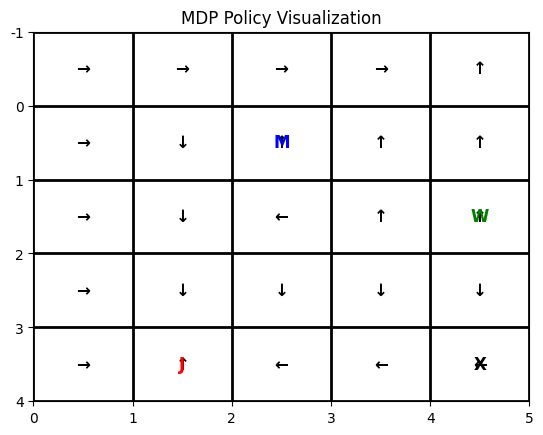

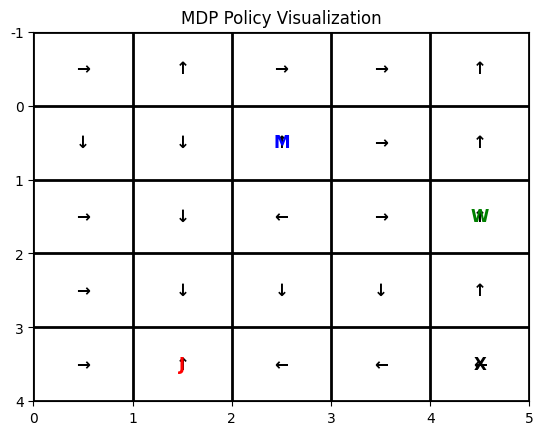

In [23]:
import matplotlib.pyplot as plt

def visualize_policy(policy, title, JEAN_POS, MAGNETO_POS, WOLVERINE_POS):
    arrows = ['↑', '→', '↓', '←']

    fig, ax = plt.subplots()

    # Create a grid with arrows based on the policy
    for i in range(5):
        for j in range(5):
            action = policy[0 if JEAN_POS == C1 else 1][MAGNETO_POS[0]][MAGNETO_POS[1]][i][j]
            arrow = arrows[action]
            # Add an offset to the x and y coordinates to place the arrows between cells
            ax.text(j + 0.5, 4 - i + 0.5, arrow, ha='center', va='center', fontsize=12, fontweight='bold')

    # Plot Jean, Magneto, and Wolverine positions
    ax.text(JEAN_POS[1] + 0.5, 4 - JEAN_POS[0] + 0.5, 'J', ha='center', va='center', fontsize=12, color='red', fontweight='bold')
    ax.text(MAGNETO_POS[1] + 0.5, 4 - MAGNETO_POS[0] + 0.5, 'M', ha='center', va='center', fontsize=12, color='blue', fontweight='bold')
    ax.text(WOLVERINE_POS[1] + 0.5, 4 - WOLVERINE_POS[0] + 0.5, 'W', ha='center', va='center', fontsize=12, color='green', fontweight='bold')
    # plot xviers school
    ax.text(4 + 0.5, 4 - 4 + 0.5, 'X', ha='center', va='center', fontsize=12, color='black', fontweight='bold')

    plt.xticks(range(6))  # Adjust the number of ticks to match the grid cells
    plt.yticks(range(6), [4, 3, 2, 1, 0, -1])  # Adjust the number of ticks to match the grid cells
    plt.grid(color='black', linestyle='-', linewidth=2)
    plt.title(title)
    plt.show()

# Example usage:
visualize_policy(policy_lazy_value_iteration, "MDP Policy Visualization", JEAN_POS, MAGNETO_POS, WOLVERINE_POS)
visualize_policy(policy_active_value_iteration, "MDP Policy Visualization", JEAN_POS, MAGNETO_POS, WOLVERINE_POS)


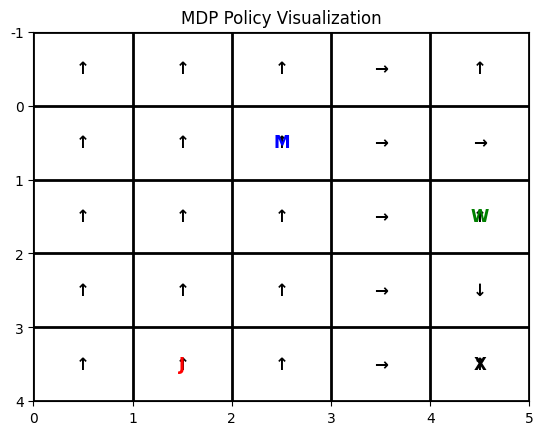

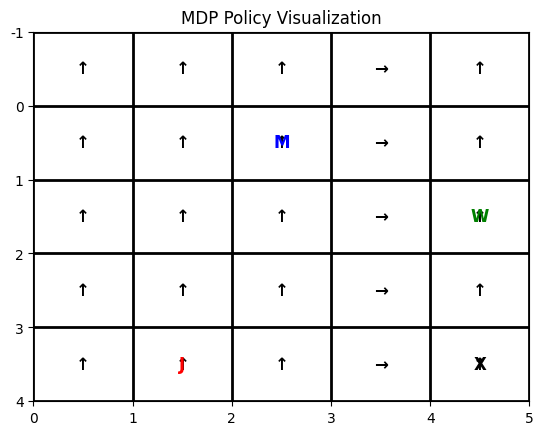

In [24]:
# visualize the policy for policy iteration
visualize_policy(policy_lazy_policy_iteration, "MDP Policy Visualization", JEAN_POS, MAGNETO_POS, WOLVERINE_POS)
visualize_policy(policy_active_policy_iteration, "MDP Policy Visualization", JEAN_POS, MAGNETO_POS, WOLVERINE_POS)

### Task 4: Comparing the results

time_taken_lazy_value_iteration 13.682692289352417
time_taken_active_value_iteration 0.8009328842163086
time_taken_lazy_policy_iteration 14.447735071182251
time_taken_active_policy_iteration 0.3385016918182373


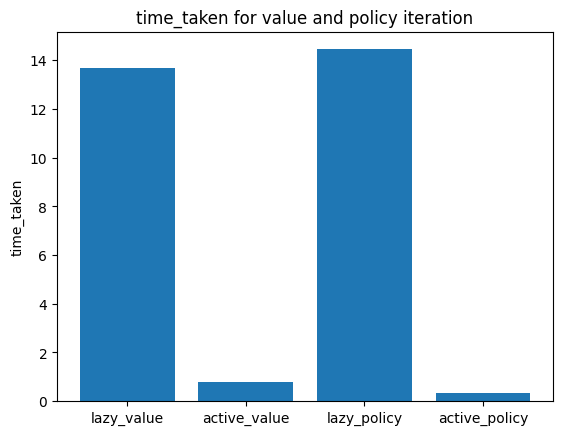

In [25]:
# compare the time taken for value iteration and policy iteration
print("time_taken_lazy_value_iteration", time_taken_lazy_value)
print("time_taken_active_value_iteration", time_taken_active_value)
print("time_taken_lazy_policy_iteration", time_taken_lazy_policy)
print("time_taken_active_policy_iteration", time_taken_active_policy)

x = np.arange(4)
y = [time_taken_lazy_value, time_taken_active_value, time_taken_lazy_policy, time_taken_active_policy]
plt.bar(x, y)
plt.xticks(x, ('lazy_value', 'active_value', 'lazy_policy', 'active_policy'))
plt.ylabel('time_taken')
plt.title('time_taken for value and policy iteration')
plt.show()
